In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
x = df.drop(columns= ["Outcome"],axis = 1)

y = df["Outcome"]

In [5]:
x.shape,y.shape

((768, 8), (768,))

In [7]:
### splitting the data set in train test split

x_train, x_test, y_train, y_test = train_test_split(
                                                x,
                                                y,
                                                train_size = 0.8,
                                                random_state= 42

)

In [8]:
x_train.shape,x_test.shape,y_train.shape

((614, 8), (154, 8), (614,))

In [9]:
## scaling the data set

# to avoid the domination of bigger values on smaller values

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [10]:
display(x_train_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [11]:
display(x_test_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
1,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
2,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
3,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
4,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
149,1.588046,1.379144,1.004713,-1.322774,-0.701206,-0.204722,-0.496677,1.400099
150,-0.828460,-1.370087,-0.725249,0.622575,-0.219029,0.170230,2.322925,-0.774936
151,1.285983,-0.807744,0.139732,-1.322774,-0.701206,0.622758,0.047040,2.096111
152,-0.526397,0.785560,0.031609,1.141335,2.398498,-0.515028,-0.392688,-0.339929


## Building Model Architecture

In [12]:
# creating the instance of model

model = tf.keras.Sequential(name = "Main_container")


# adding the input layer to model
model.add(tf.keras.layers.Input(shape = [8],name = "input_layer"))

#creating the 1st hidden layer
model.add(tf.keras.layers.Dense(units = 9,activation = "relu",name = "hidden_layer_1"))

# creating 2nd hidden layer
model.add(tf.keras.layers.Dense(units = 8,activation = "relu",name = "hidden_layer_2"))

# creating 3rd hidden layer
model.add(tf.keras.layers.Dense(units = 4, activation = "relu",name = "hidden_layer_3"))

# creating an output layer
model.add(tf.keras.layers.Dense(units = 1 ,activation = "sigmoid",name = "output_layer"))

## weight initilize

In [19]:
model.layers[1].get_weights()

[array([[-0.0786888 ,  0.21167582,  0.42154765, -0.0128873 , -0.21881017,
         -0.42426932,  0.19248462, -0.3236565 ],
        [-0.14624226,  0.56632304,  0.48533583, -0.03609586, -0.00232148,
          0.1147961 ,  0.2222206 , -0.36357313],
        [-0.07062316, -0.4302361 , -0.4403295 ,  0.05662143,  0.18243587,
          0.02941656,  0.09292787, -0.329177  ],
        [ 0.4008075 , -0.11752555, -0.12889653, -0.3739689 ,  0.5246663 ,
         -0.47422194, -0.3720838 , -0.34095746],
        [-0.05709225,  0.48425245, -0.4344559 , -0.14097178, -0.5498217 ,
         -0.06694102, -0.06802189, -0.07046562],
        [ 0.16660738, -0.5435342 , -0.4827434 ,  0.19877607,  0.15410823,
         -0.02798092, -0.07851076, -0.41283187],
        [ 0.09217733, -0.3332033 , -0.28656945,  0.0936361 ,  0.26516867,
          0.5627904 ,  0.47881663, -0.53118235],
        [ 0.04792517,  0.5358963 ,  0.4578154 ,  0.4881183 ,  0.26853848,
         -0.2047219 , -0.28584862, -0.24380496],
        [-0.0716

In [20]:
model.summary()   # input = 8

Model: "Main_container"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 9)                 81        
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 80        
                                                                 
 hidden_layer_3 (Dense)      (None, 4)                 36        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 202 (808.00 Byte)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


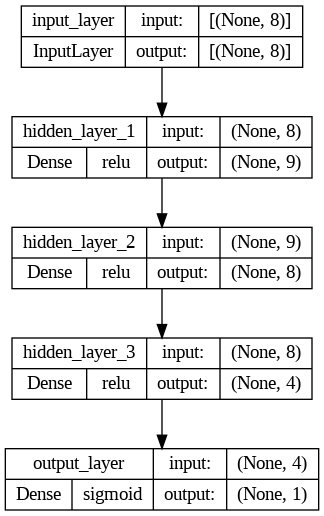

In [21]:
plot_model(
    model,
    show_shapes = True,
    show_layer_names = True,
    show_layer_activations = True
)

In [22]:
# once the architecture is being created next step is to add functionality to the model

model.compile(
            loss = "binary_crossentropy",
            optimizer = "adam",
            metrics = ["accuracy"]
)

In [25]:
# now lets fit the data

history = model.fit(
                x_train_scaled,
                y_train,
                verbose = True,
                batch_size = 16,
                validation_split = 0.2,
                epochs = 100,
                workers = 10,
                use_multiprocessing = True
)

Epoch 1/100
31/31 [==============================] - 4s 18ms/step - loss: 0.6922 - accuracy: 0.4725 - val_loss: 0.6935 - val_accuracy: 0.5203
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6253 - val_loss: 0.6706 - val_accuracy: 0.6504
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6396 - accuracy: 0.6965 - val_loss: 0.6515 - val_accuracy: 0.6585
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6117 - accuracy: 0.7006 - val_loss: 0.6372 - val_accuracy: 0.6260
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.6925 - val_loss: 0.6274 - val_accuracy: 0.6341
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5713 - accuracy: 0.7026 - val_loss: 0.6177 - val_accuracy: 0.6585
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.7169 - val_loss: 0.6097 - val_accuracy: 0.6748
Epoch 8/100


In [36]:
#history.history

In [27]:
# we can plot accuracy against epochs and losses

def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("Model "+ keyword)
  plt.ylabel(keyword)
  plt.xlabel("epochs")

  plt.legend(["Training Data","Validation_Data"])

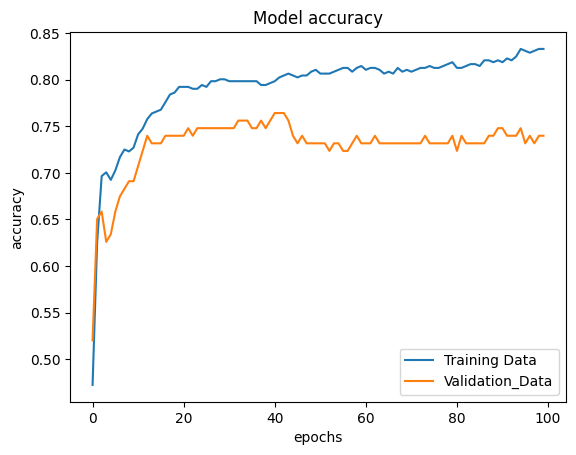

In [28]:
plotting(history,"accuracy")

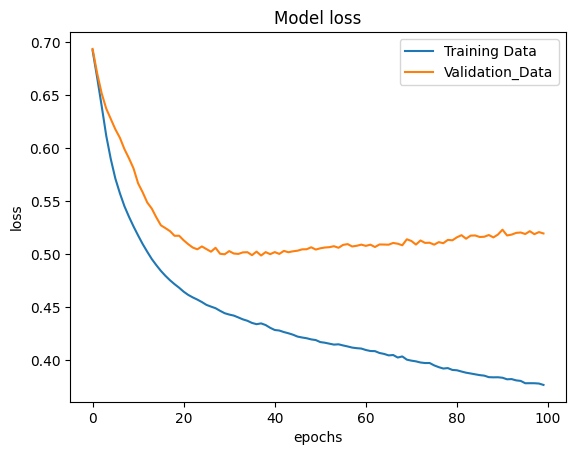

In [29]:
plotting(history,"loss")

In [32]:
# prdicting on test data

y_logs = model.predict(x_test_scaled)

y_pred = np.where(y_logs>0.5,1,0)

y_pred[:10]

5/5 [==============================] - 0s 5ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)

print("Accuracy on testing data is : ",acc)

Accuracy on testing data is :  0.7597402597402597


## Using Multiple Optimizers

"""
tf.keras.optimizers.RMSprop()
tf.keras.optimizers.Adam()
tf.keras.optimizers.Adadelta()
tf.keras.optimizers.Adagrad()

"""


In [40]:
# creating the instance of model

model = tf.keras.Sequential(name = "Main_container")


# adding the input layer to model
model.add(tf.keras.layers.Input(shape = [8],name = "input_layer"))

#creating the 1st hidden layer
model.add(tf.keras.layers.Dense(units = 9,activation = "relu",name = "hidden_layer_1"))

# creating 2nd hidden layer
model.add(tf.keras.layers.Dense(units = 8,activation = "relu",name = "hidden_layer_2"))

# creating 3rd hidden layer
model.add(tf.keras.layers.Dense(units = 4, activation = "relu",name = "hidden_layer_3"))

# creating an output layer
model.add(tf.keras.layers.Dense(units = 1 ,activation = "sigmoid",name = "output_layer"))


# once the architecture is being created next step is to add functionality to the model

model.compile(
            loss = "binary_crossentropy",
            optimizer = tf.keras.optimizers.Adagrad(),
            metrics = ["accuracy"]
)
# now lets fit the data

history = model.fit(
                x_train_scaled,
                y_train,
                verbose = True,
                batch_size = 16,
                validation_split = 0.2,
                epochs = 2,
                workers = 10,
                use_multiprocessing = True
)

Epoch 1/2
31/31 [==============================] - 2s 31ms/step - loss: 0.6468 - accuracy: 0.6640 - val_loss: 0.6911 - val_accuracy: 0.6098
Epoch 2/2
31/31 [==============================] - 0s 11ms/step - loss: 0.6440 - accuracy: 0.6640 - val_loss: 0.6885 - val_accuracy: 0.6098


#Adam Optimizer

In [ ]:
"""
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam",
    **kwargs
)
"""

In [ ]:
"""

Arguments

learning_rate: A tf.Tensor, floating point value, a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.

beta_1: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. The exponential decay rate for the 1st moment estimates. Defaults to 0.9.

beta_2: A float value or a constant float tensor, or a callable that takes no arguments and returns the actual value to use. The exponential decay rate for the 2nd moment estimates. Defaults to 0.999.

epsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to 1e-7.

amsgrad: Boolean. Whether to apply AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and beyond". Defaults to False.

name: String. The name to use for momentum accumulator weights created by the optimizer.

weight_decay: Float, defaults to None. If set, weight decay is applied.

clipnorm: Float. If set, the gradient of each weight is individually clipped so that its norm is no higher than this value.

clipvalue: Float. If set, the gradient of each weight is clipped to be no higher than this value.

global_clipnorm: Float. If set, the gradient of all weights is clipped so that their global norm is no higher than this value.

use_ema: Boolean, defaults to False. If True, exponential moving average (EMA) is applied. EMA consists of computing an exponential moving average of the weights of the model (as the weight values change after each training batch), and periodically overwriting the weights with their moving average.

ema_momentum: Float, defaults to 0.99. Only used if use_ema=True. This is the momentum to use when computing the EMA of the model's weights: new_average = ema_momentum * old_average + (1 - ema_momentum) * current_variable_value.

ema_overwrite_frequency: Int or None, defaults to None. Only used if use_ema=True. Every ema_overwrite_frequency steps of iterations, we overwrite the model variable by its moving average. If None, the optimizer does not overwrite model variables in the middle of training, and you need to explicitly overwrite the variables at the end of training by calling optimizer.finalize_variable_values() (which updates the model variables in-place). When using the built-in fit() training loop, this happens automatically after the last epoch, and you don't need to do anything.

jit_compile: Boolean, defaults to True. If True, the optimizer will use XLA compilation. If no GPU device is found, this flag will be ignored.

mesh: optional tf.experimental.dtensor.Mesh instance. When provided, the optimizer will be run in DTensor mode, e.g. state tracking variable will be a DVariable, and aggregation/reduction will happen in the global DTensor context.

**kwargs: keyword arguments only used for backward compatibility.

"""